In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2
%matplotlib inline

### load data

In [2]:
test_data=pd.read_csv('test.txt',header=None,sep=' ',names=['picture','label'])
train_data=pd.read_csv('train.txt',header=None,sep=' ',names=['picture','label'])
valid_data=pd.read_csv('valid.txt',header=None,sep=' ',names=['picture','label'])

test_data['dir']=['preprocessed/'+'test/'+pic for pic in test_data['picture']]
train_data['dir']=['preprocessed/'+'train/'+pic for pic in train_data['picture']]
valid_data['dir']=['preprocessed/'+'valid/'+pic for pic in valid_data['picture']]

total_set = pd.concat([test_data,train_data,valid_data],ignore_index=True)
iid_total_set = pd.concat([total_set[total_set['label']==i] for i in range(5)]).reset_index(drop=True)
random_set = iid_total_set.reindex(np.random.permutation(iid_total_set.index))
new_label = [str(i==0) for i in random_set['label'].values] #true means healthy
random_set['new_label']=new_label
## settings####################################################################################
batch_SIZE=300
img_SIZE = 224

val_len = 2522
val_set = random_set[:val_len]
train_set = random_set[val_len:]

In [3]:
worker_nb = 3
worker_data = int(len(train_set)/worker_nb)

In [4]:
worker1 = train_set[0:worker_data]
worker2 = train_set[worker_data:worker_data*2]
worker3 = train_set[worker_data*2:worker_data*3]

In [5]:
worker1.to_pickle('assign/worker1.pkl')
worker2.to_pickle('assign/worker2.pkl')
worker3.to_pickle('assign/worker3.pkl')
val_set.to_pickle('assign/val_set.pkl')
train_set.to_pickle('assign/train_set.pkl')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B622459C8>]],
      dtype=object)

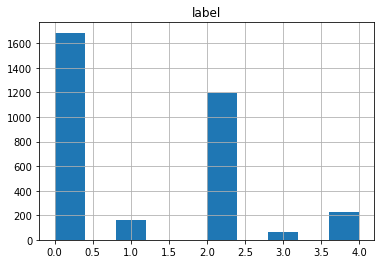

In [6]:
pd.read_pickle('assign/worker3.pkl').hist()